## Problem 1
**Understanding the Content of the Competition**

#### What Kind of Company is **_Home Credit_**?
Home Credit is an international financial provider. Their primary focus is responsible lending to people with little or no credit. They strive to achieve financial inclusion for such persons. They make use of a varitey of alternative data to predict their clients ability to repay loans.  
#### What is Expected in This Competition?
Currently, _Home Credit_ uses various statistical and machine learning methods to make these predictions. This competition serves as a challenge to participants to figure out how to effectively use the company's data to make the most accurate predictions.
#### What are The Benefits the Company can Gain by Predicting This?
To start with, improving the performance of the predictions means that clients who are able to repay loans are not rejected, and vice-versa. It allows more persons with minimal credit history to take out loans without issue. It also allows the company to give out loans with the right principal, maturity and repayment calender that will allow their clients to be successful.


## Problem 2
**Understanding the Overview of the Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Checking for Missing Values

In [6]:
pd.set_option('display.max_rows', 500)
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values[missing_values.Total > 0]

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [7]:
missing_values[missing_values.Total > 0].count()

Total      67
Percent    67
dtype: int64

The dataset contains 122 variables including 1 target and 1 id variables. 106 variables including the target and ID are numerical, whilst the other 16 are categorical.  
There are missing values present in 67 features. Features like `COMMONAREA_MEDI`, `ELEVATORS_MEDI`, `NONLIVINGAREA_MODE` and more have a significant amount of missing values. Some groups of features have same number of missing values, suggesting there might be a relationship there.  
`CNT_FAM_MEMBERS` and `DAYS_LAST_PHONE_CHANGE` have just a minimal number of missing values, so the rows containing those values can be discarded.

## Problem 3
**Defining Issues**

- Is the data balanced?
- What types of loans are people taking?
- Which loans are being repayed the most?
- Which gender is mostly taking loans, are they repaying?
- Does a persons marital status have an effect on whether or not people repay their loans?
- Which features are best correlated with the target variable?
- Are there features with high correlation to each other?

## Problem 4
**Data Exploration**

Checking to See if the Data is Balanced  
0 means loan is repayed. 1 means loan is not repayed

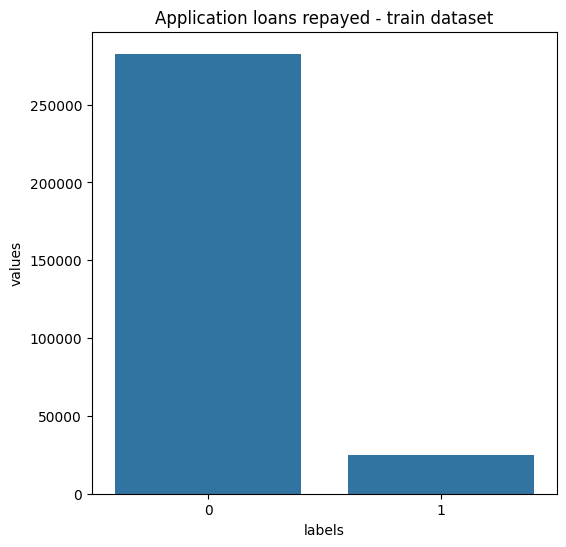

In [8]:
temp = df["TARGET"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
#sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=temp_df)
locs, labels = plt.xticks()
plt.show()

The graph shows that the data is very unbalanced. Most of the data is for people that have repayed their loans.

**Loan Types**  
What types of loans are people taking? Which loans do people repay the most

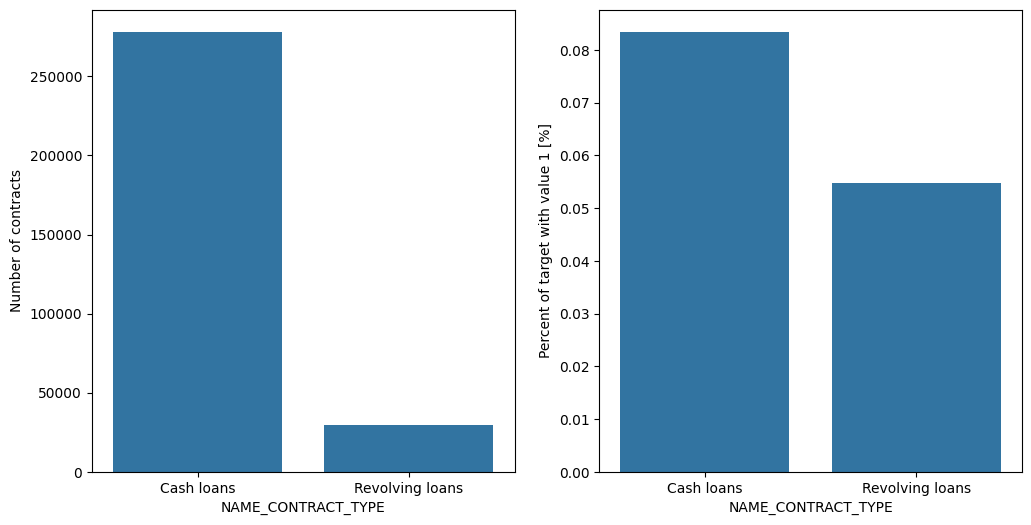

In [9]:
temp = df['NAME_CONTRACT_TYPE'].value_counts()
df1 = pd.DataFrame({'NAME_CONTRACT_TYPE': temp.index,'Number of contracts': temp.values})

# Calculate the percentage of target=1 per category value
cat_perc = df[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.set_color_codes("pastel")
s = sns.barplot(ax=ax1, x = 'NAME_CONTRACT_TYPE', y="Number of contracts",data=df1)
#s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
s = sns.barplot(ax=ax2, x = 'NAME_CONTRACT_TYPE', y='TARGET', order=cat_perc['NAME_CONTRACT_TYPE'], data=cat_perc)
#s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

More people are taking out cash loans than revolving loans. Only about 10% of people take out revolving loans. Out of the people taking cash loans, about 8.5% are not repaid, while for those taking revolving loans, about 5.5% are not repaid. When considering that only a tiny fraction of people take out revolving loans, it can be said that a large amount don't repay their revolving loans compared to the frequency at which people take out said loans.

**Gender of Loan Takers**

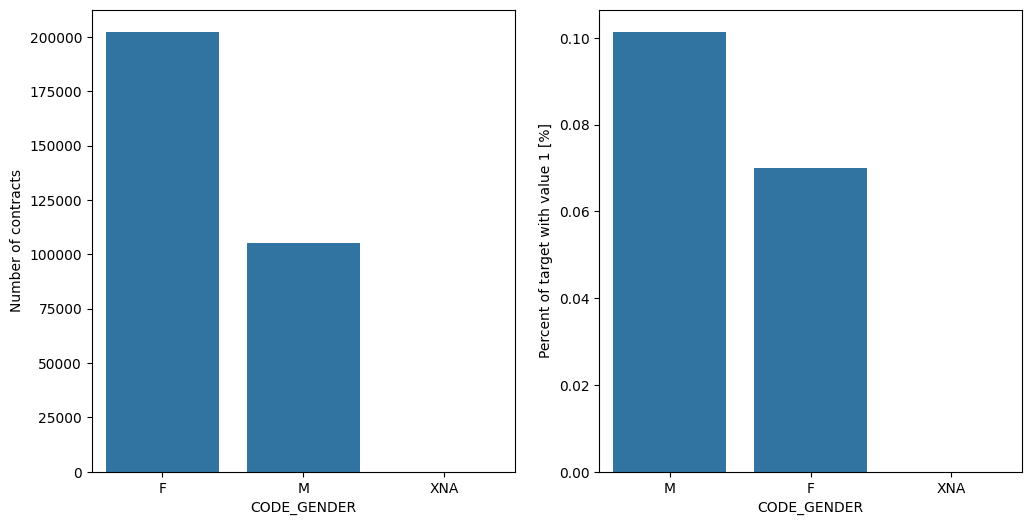

In [10]:
temp = df['CODE_GENDER'].value_counts()
df1 = pd.DataFrame({'CODE_GENDER': temp.index,'Number of contracts': temp.values})

# Calculate the percentage of target=1 per category value
cat_perc = df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
#sns.set_color_codes("pastel")
s = sns.barplot(ax=ax1, x = 'CODE_GENDER', y="Number of contracts",data=df1)
    
s = sns.barplot(ax=ax2, x = 'CODE_GENDER', y='TARGET', order=cat_perc['CODE_GENDER'], data=cat_perc)
plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

Looking at the graph, mostly females are taking out loans. 10% of men do not repay their loans as opposed to the 7% of women who do not repay their loans. Despite less men taking out loans, the graph shows that men are more unlikely to repay their loans than women.

**Marital Status vs Loan Repayment**

C:\Users\USER\AppData\Local\Temp\ipykernel_13944\796534642.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\USER\AppData\Local\Temp\ipykernel_13944\796534642.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


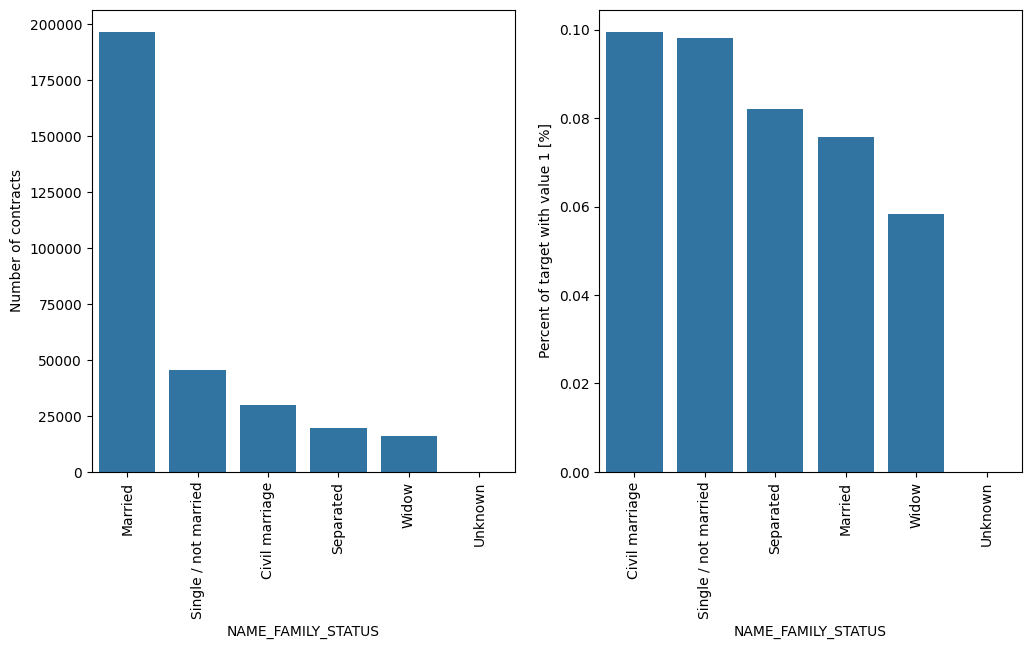

In [11]:
temp = df['NAME_FAMILY_STATUS'].value_counts()
df1 = pd.DataFrame({'NAME_FAMILY_STATUS': temp.index,'Number of contracts': temp.values})

# Calculate the percentage of target=1 per category value
cat_perc = df[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean()
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
#sns.set_color_codes("pastel")
s = sns.barplot(ax=ax1, x = 'NAME_FAMILY_STATUS', y="Number of contracts",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
s = sns.barplot(ax=ax2, x = 'NAME_FAMILY_STATUS', y='TARGET', order=cat_perc['NAME_FAMILY_STATUS'], data=cat_perc)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

Mostly married individuals are clients, followed by single/not married then civil marriage then separated then widows. However those in civil marriages are mostly not repaying their loans. While widows have the least percent of people not repaying loans

**Relationship Between Variables and Target**

In [12]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988


<Axes: >

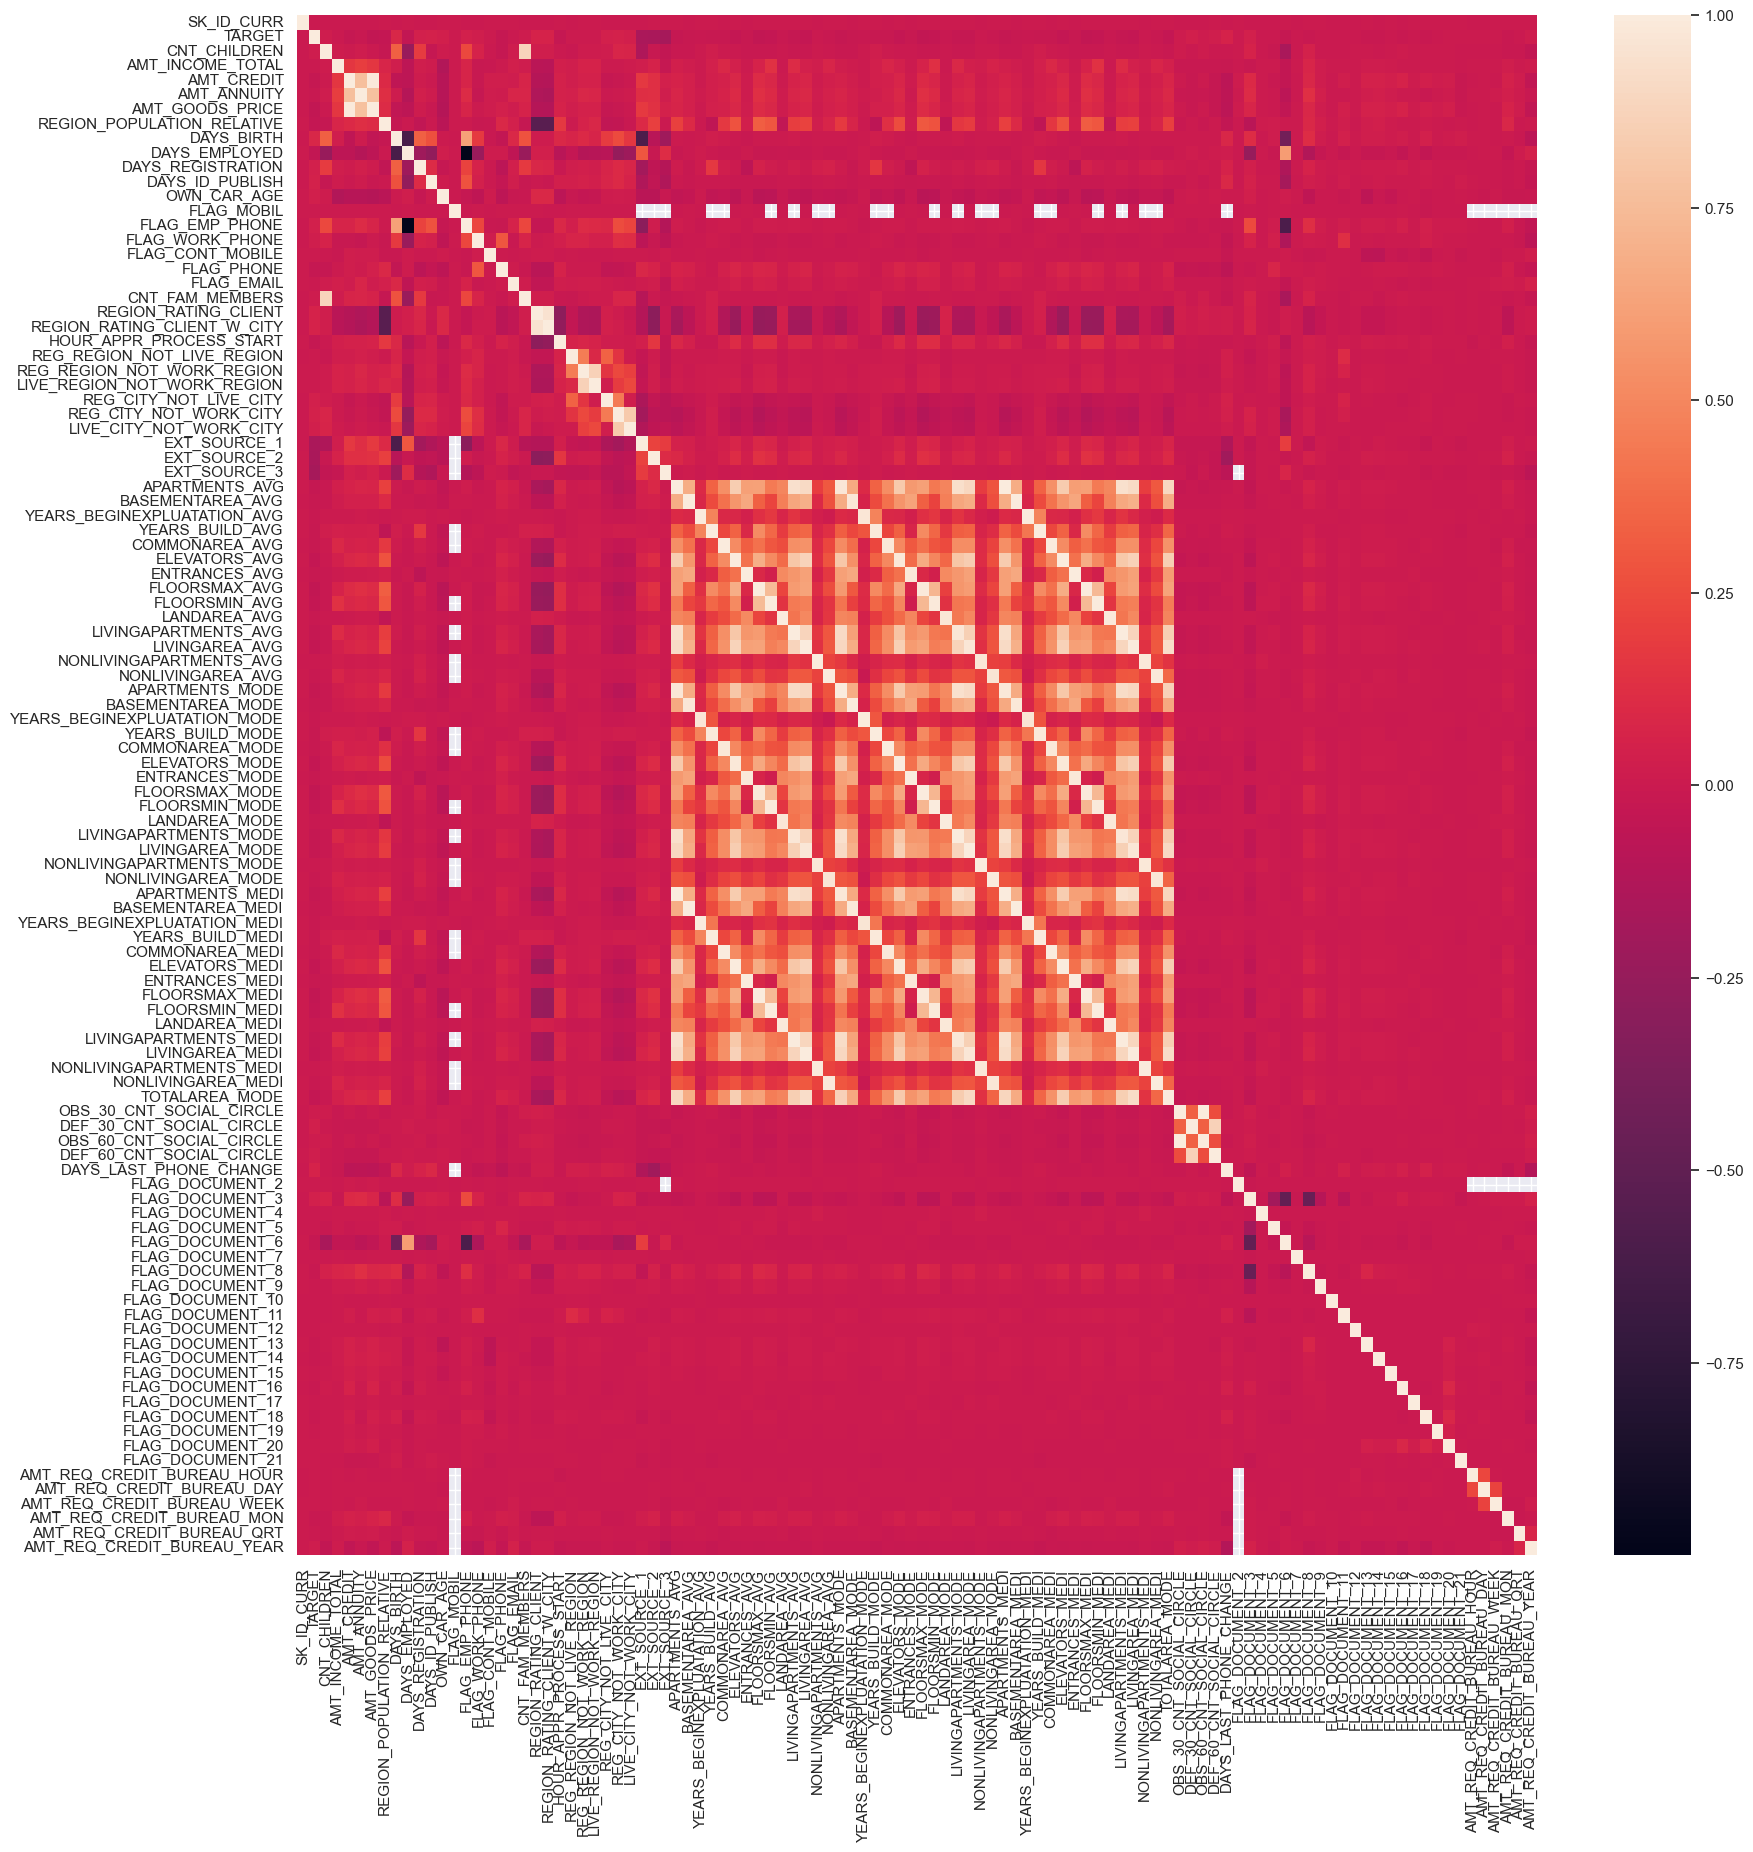

In [13]:
sns.set(font_scale=0.05)
sns.set (rc = {'figure.figsize':(20, 20)})
sns.heatmap(corr_matrix, xticklabels=True, yticklabels=True)

From the table and graph, none of the variables have a strong correlation with the TARGET

**Variables with Strong Relationships with each other**

Some of the variable groups with strong relationship with each other include:  
- `AMT_CREDIT`, `AMT_ANNUITY` and `AMT_GOODS_PRICE` all have a strong relationship with each other.
- `REGION_RATING_CLIENT` and `REGION_RATING_CLIENT_W_CITY` equally have a strong relationship with other.
- `REG_REGION_NOT_WORK_REGION` and `LIVE_REGION_NOT_WORK_REGION` also have a strong relationship with each other
- `LIVINGAPARTMENTS_AVG` and `LIVINGAREA_AVG` have a strong relationship with each other
- `LIVINGAPARTMENTS_MODE` and `LIVINGAREA_MODE` have a strong relationship with each other
- `LIVINGAPARTMENTS_MEDI` and `LIVINGAREA_MEDI` have a strong relation with each other.  

For each of these groups of variables, since there is a strong correlation between them then it would be redundant to use all of them in building a model. One variable from each group can be used while the others are dropped.